In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


meta_dir = "/DATA4T/civitai/meta"

In [2]:
def get_all_items(path, num:int):
    ls = list()
    for i in range(1, num+1):
        with open(os.path.join(path, f"{i}.json"), "r") as f:
            dic = json.loads(f.read())
            ls += dic["items"]
    return ls

            
def find_model_id(items, id_num:int):
    for i in items:
        if id_num == i["id"]:
            return i
def find_model_name(items, name:str):
    for i in items:
        if name in i["name"]:
            return i

def get_all_stats(items, name):
    assert name in ["downloadCount", "rating", "ratingCount", "commentCount", "favoriteCount"]
    rt = list()
    for i in items:
        rt.append(i["stats"][name])
    return rt


In [3]:
all_item = get_all_items(meta_dir, 632)

In [4]:
it = find_model_id(all_item, 6424)

In [7]:
it["type"]

'Checkpoint'

In [5]:
downloads = get_all_stats(all_item, "downloadCount")
favs = get_all_stats(all_item, "favoriteCount")

In [45]:
find_model_id(all_item, 11745)

median: 105.0
mean: 254.4240506329114


3591

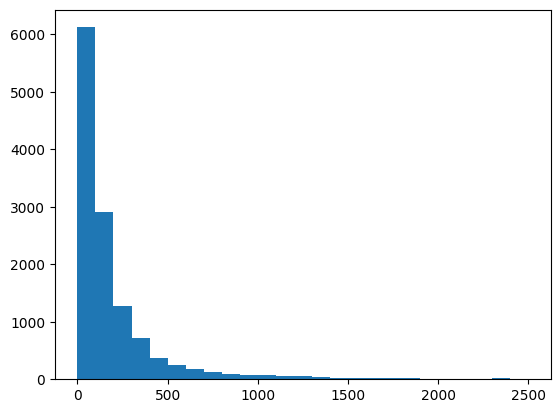

In [6]:
favs = np.array(favs)
hist,bins = np.histogram(favs,bins=list(range(0, int(10* np.mean(favs)), 100)))
plt.hist(favs, bins = bins)
print("median:", np.median(favs))
print("mean:", np.mean(favs))
np.count_nonzero(favs > 200)

median: 498.0
mean: 1426.3457278481012


3782

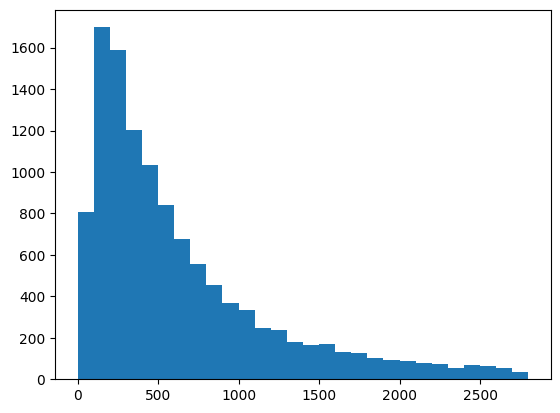

In [7]:
downloads = np.array(downloads)
hist,bins = np.histogram(downloads,bins=list(range(0, int(2* np.mean(downloads)), 100)))  
plt.hist(downloads, bins = bins)
print("median:", np.median(downloads))
print("mean:", np.mean(downloads))
np.count_nonzero(downloads > 900)

In [8]:
it = find_model_id(all_item, 6424)
it["modelVersions"][0].keys()

dict_keys(['id', 'modelId', 'name', 'createdAt', 'updatedAt', 'trainedWords', 'baseModel', 'earlyAccessTimeFrame', 'description', 'files', 'images', 'downloadUrl'])

In [12]:
it["modelVersions"][0]["images"]

[{'url': 'https://imagecache.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/20fcc1d7-29ce-42d8-1502-02c4e50e9100/width=450/174703',
  'nsfw': True,
  'width': 512,
  'height': 784,
  'hash': 'UHFsAA0000~W*0IARQRj%#IU$*oL?bNGM{Rj',
  'meta': {'Size': '512x784',
   'seed': 21364683354,
   'Model': 'chilloutmix_NiPrunedFp32Fix',
   'steps': 33,
   'prompt': 'complex 3d render ultra detailed of a beautiful porcelain profile woman android face, cyborg, robotic parts, 150 mm, beautiful studio soft light, rim light, vibrant details, luxurious cyberpunk, lace, hyperrealistic, anatomical, facial muscles, cable electric wires, microchip, elegant, beautiful background, octane render, H. R. Giger style, 8k, best quality, masterpiece, illustration, an extremely delicate and beautiful, extremely detailed ,CG ,unity ,wallpaper, (realistic, photo-realistic:1.37),Amazing, finely detail, masterpiece,best quality,official art, extremely detailed CG unity 8k wallpaper, absurdres, incredibly absurdres,  <lora:japanese

In [82]:
type_list = []
for i in all_item:
    if i["type"] in type_list:
        continue
    else:
        type_list.append(i['type'])

In [83]:
type_list

['Checkpoint',
 'LORA',
 'Other',
 'TextualInversion',
 'Hypernetwork',
 'Poses',
 'Controlnet',
 'Wildcards',
 'LoCon',
 'AestheticGradient']

In [ ]:
type_to_sufix = {
    "Checkpoint": 
    "TextualInversion": "pt",
    ""
}